                                                                         ET3112- Image Processing  
                                                                      Assignment 2 - Spatial Filtering 

Name - K.V.Wickramanayake   
Index No - D/ENG/21/0073/EE  
GitHub link - 




Question 01   

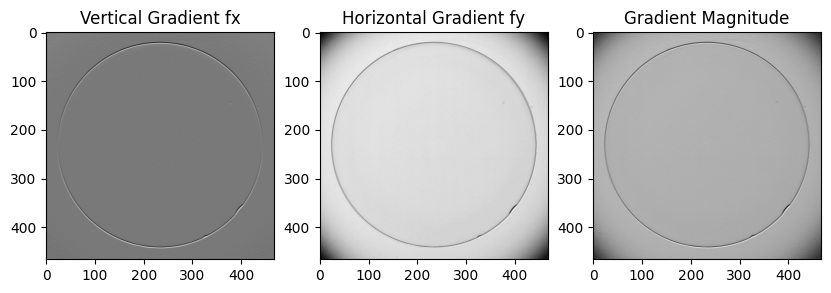

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32)
img_x = cv.filter2D(img.astype('float'), -1,sobel_v)
img_x = cv.normalize(img_x.astype('float'), None, 0, 255.0, cv.NORM_MINMAX)

sobel_h = np.array([[-1,0,1],[0,0,0],[1,2,1]], np.float32)
img_y = cv.filter2D(img.astype('float'),-1, sobel_h)
img_y = cv.normalize(img_y.astype('float'),None,0,255.0,cv.NORM_MINMAX)

img1= cv.addWeighted(np.absolute(img_x),1,np.absolute(img_y),1,0)

fg,ax = plt.subplots(1,3,figsize = (10,5))
ax[0].imshow(img_x, cmap='gray')
ax[0].set_title("Vertical Gradient fx")
ax[1].imshow(img_y, cmap='gray')
ax[1].set_title("Horizontal Gradient fy")
ax[2].imshow(img1, cmap='gray')
ax[2].set_title("Gradient Magnitude")
plt.show()




Question 02

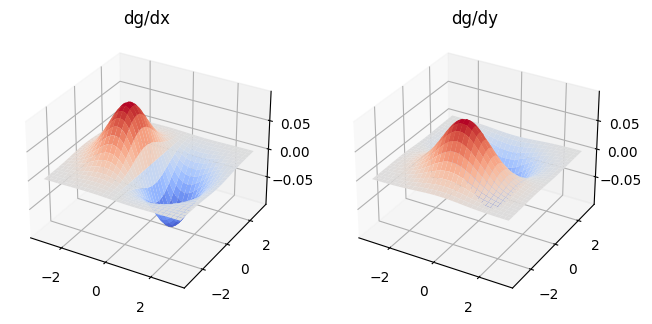

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#Defining the variable regions
y, x = np.arange(-3, 3.1, 0.1), np.arange(-3, 3.1, 0.1)
Y, X = np.meshgrid(x,y)
Z=np.zeros_like(X)
sigma = 1.
#3D Gaussian Kernel
g = 1.0 / (2.0 * np.pi * sigma**2) * np.exp(-(X**2 + Y**2 + Z**2) / (2.0 * sigma**2))

#Derivatives of 3D Gaussian Kernel
g_x = (-X/sigma**2)*g
g_y = (-Y/sigma**2)*g

#Plotting the Kernals
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131, projection = '3d')
ax1.set_title("dg/dx")
ax1.plot_surface(X,Y,g_x, cmap='coolwarm')
ax2 = fig.add_subplot(132, projection = '3d')
ax2.set_title("dg/dy")
ax2.plot_surface(X,Y,g_y, cmap='coolwarm')
plt.show()






Question 03

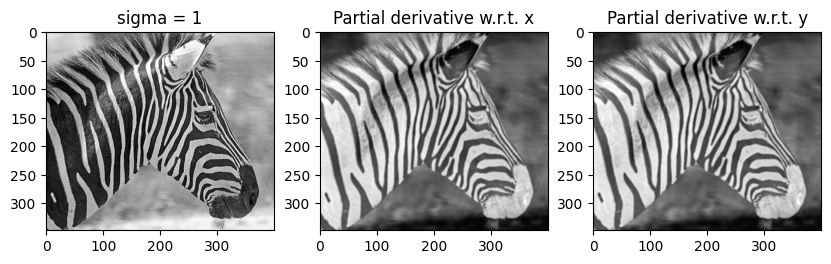

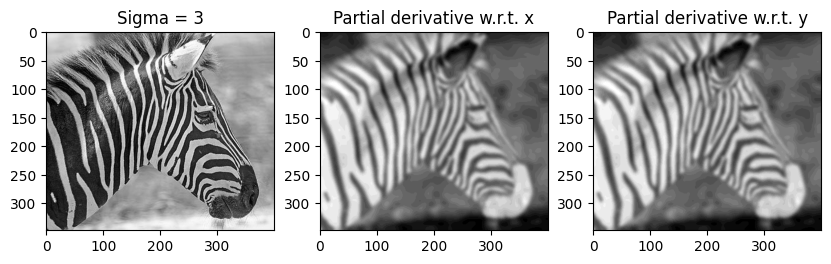

In [1]:
import numpy as np
import cv2 as cv
from scipy import ndimage
import matplotlib.pyplot as plt

img = cv.imread('zebrahead.jpg', cv.IMREAD_GRAYSCALE)

sigma = 1
#Gaussian kernel and its derivatives
g = np.zeros((5*sigma, 5*sigma))
for i in range(5*sigma):
    for j in range(5*sigma):
        x = i - 2*sigma
        y = j - 2*sigma
        g[i, j] = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
g_x = ndimage.convolve(img, -g/sigma**2)
g_y = ndimage.convolve(img, -g.T/sigma**2)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('sigma = 1')
axs[1].imshow(g_x, cmap='gray')
axs[1].set_title('Partial derivative w.r.t. x')
axs[2].imshow(g_y, cmap='gray')
axs[2].set_title('Partial derivative w.r.t. y')
plt.show()

sigma = 3

#Gaussian kernel and its derivatives
g = np.zeros((5*sigma, 5*sigma))
for i in range(5*sigma):
    for j in range(5*sigma):
        x = i - 2*sigma
        y = j - 2*sigma
        g[i, j] = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
g_x = ndimage.convolve(img, -g/sigma**2)
g_y = ndimage.convolve(img, -g.T/sigma**2)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Sigma = 3')
axs[1].imshow(g_x, cmap='gray')
axs[1].set_title('Partial derivative w.r.t. x')
axs[2].imshow(g_y, cmap='gray')
axs[2].set_title('Partial derivative w.r.t. y')
plt.show()